### Netflix Data Science Project

In [485]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message="X does not have valid feature names")

In [486]:
#to read the .csv file
netflix_data = pd.read_csv('netflix1.csv')

In [487]:
#to read the first 3 data
netflix_data.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [488]:
#info() to get a  overview of the DataFrame, showing how many values are missing, and what type of data is present.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


As we can see there are no missing values in the following dataframes.

In [490]:
#to check the rows and coluns in 2d array
netflix_data.shape

(8790, 10)

In [491]:
#to check the data columns
netflix_data.columns.values

array(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'], dtype=object)

In [492]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data Cleaning


Identify and handle missing data, correct data types and drop duplicates

In [495]:
#check for missing values
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [496]:
#to remove the duplicate values
netflix_data.drop_duplicates(inplace= True)

In [497]:
#Drop rows with missing cirtical info
netflix_data.dropna(subset=['director','country'], inplace=True)

In [498]:
!pip install wordcloud

In [499]:
from wordcloud import WordCloud

In [500]:
#convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [501]:
#data types to confirm the changes
print(netflix_data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


### Exploratory Data Analysis(EDA)

In [503]:
#distribution of release year
release_year_distribution = netflix_data['release_year'].value_counts().sort_index()
release_year_distribution.head(3)

release_year
1925    1
1942    2
1943    3
Name: count, dtype: int64

In [504]:
#distibution of rating
rating_distribution = netflix_data['rating'].value_counts()
rating_distribution.head(3)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
Name: count, dtype: int64

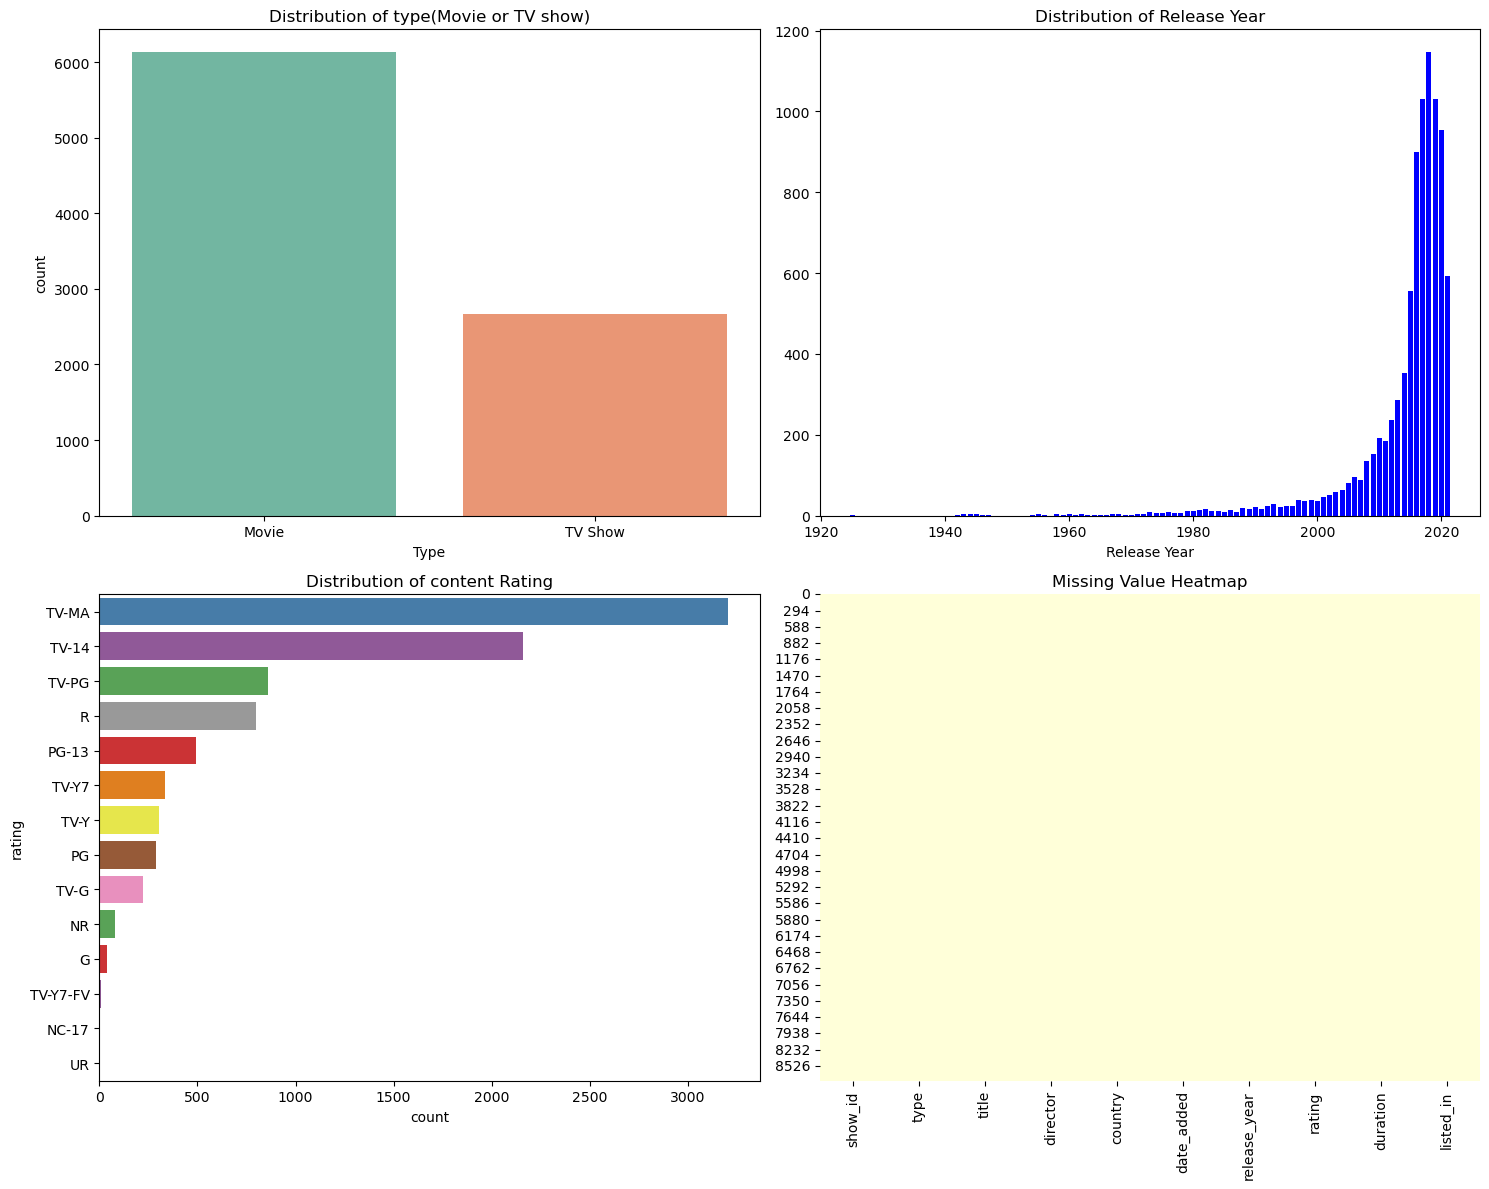

In [505]:
#plotting the distribution of 'type', 'release year' and 'rating'
fig, axes = plt.subplots(2,2, figsize=(15,12))

#plot: type distribution(movies/ tv shows)
sns.countplot(ax=axes[0,0], data=netflix_data, x='type',palette='Set2', hue='type', legend=False)
axes[0,0].set_title('Distribution of type(Movie or TV show)', fontsize=12)
axes[0,0].set_xlabel('Type')

#plot: Release year distribution
axes[0,1].bar(release_year_distribution.index, release_year_distribution.values, color='blue')
axes[0,1].set_title('Distribution of Release Year', fontsize=12)
axes[0,1].set_xlabel('Release Year')

#plot: rating Distribution
sns.countplot(ax=axes[1,0], data=netflix_data, y='rating', palette='Set1', order=rating_distribution.index, hue = 'rating', legend=False)
axes[1,0].set_title('Distribution of content Rating', fontsize=12)

#plot: Missing value heatmap
sns.heatmap(netflix_data.isnull(), cbar=False, cmap="YlGnBu", ax=axes[1,1])
axes[1,1].set_title('Missing Value Heatmap', fontsize=12)

plt.tight_layout()
plt.show()

EDA Findings
1. Missing values: No missing values were detected in amy of the columns
2. content type:: the dataset consist of 6126 Movies and 2664 TV shows, Showing that movie dominate the dataset
3. Release Year: The dataset include content spanning multiple decades with a consitent increase in release in more recent years.
4. Ratings:"TV-MA"(Mature Audience is the most commom rating, followed by "TV-14" and 'TV-PG'

In [507]:
#Most Common Genres
#Split the 'listed_in' columns and count genres
netflix_data['genres']= netflix_data['listed_in'].apply(lambda x: x.split(','))
all_genres=sum(netflix_data['genres'],[])
genre_count= pd.Series(all_genres).value_counts()
#print(all_genres)
print(genre_count)

 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64


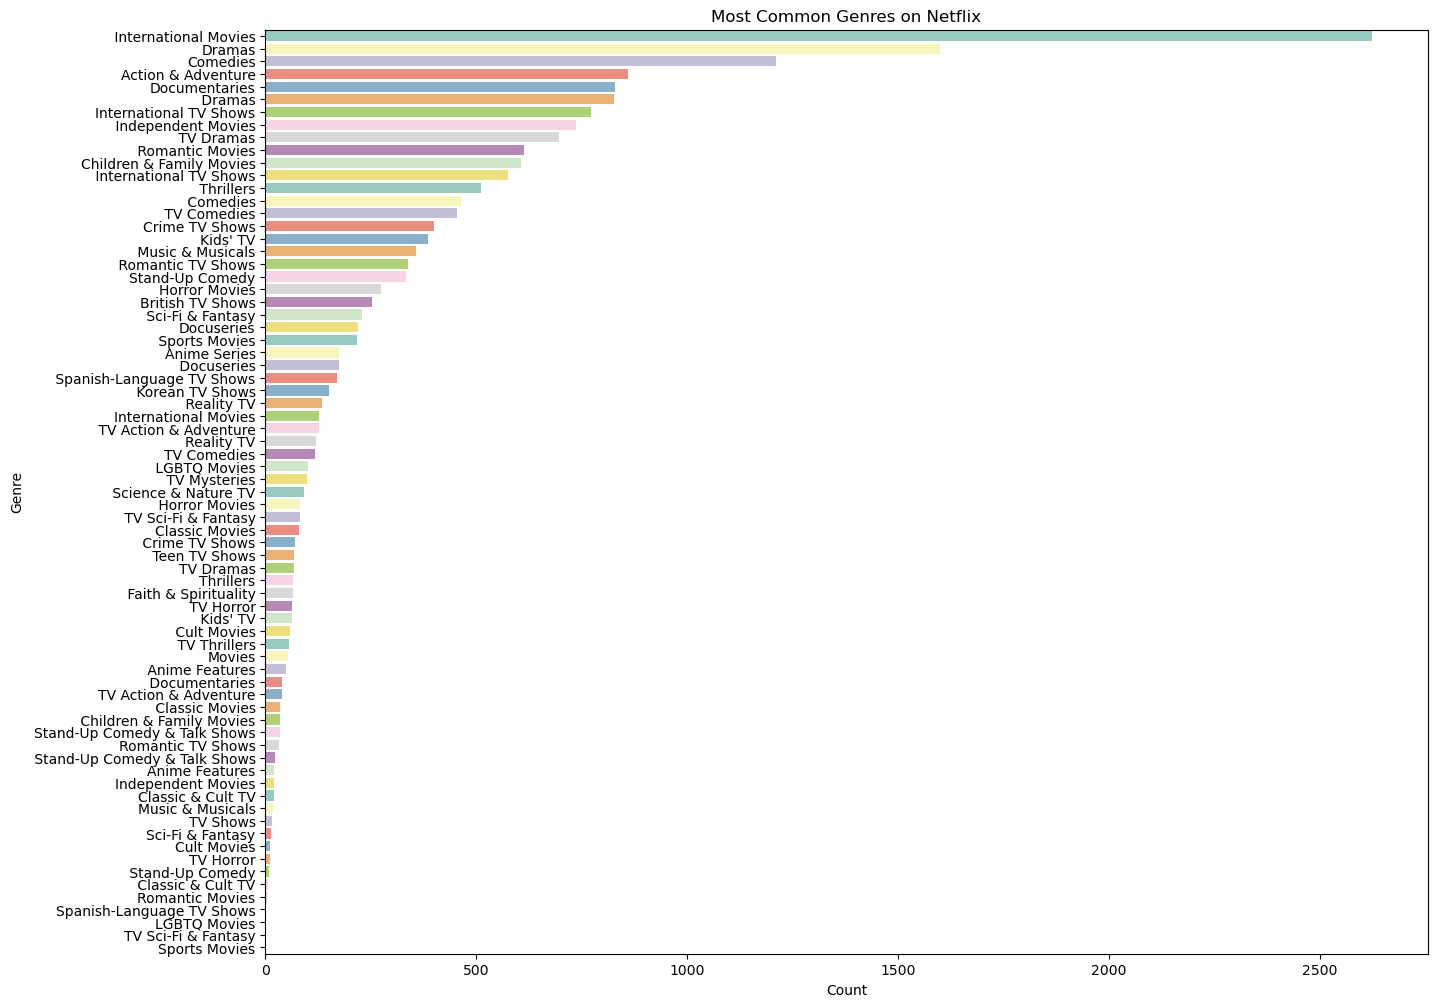

In [508]:
#plot the most commom genres
plt.figure(figsize=(15,12))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set3',hue=genre_count.index, legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [509]:
# Feature 1: Count the number of genres per show/movie
netflix_data['genre_count'] = netflix_data['listed_in'].apply(lambda x: len(x.split(',')))

# Feature 2: Extract duration in minutes for movies (keeping TV shows as-is)
def extract_duration(row):
    if 'Season' in row['duration']:
        return row['duration']  # For TV shows, keep the '1 Season' or 'X Seasons'
    else:
        return int(row['duration'].split()[0])  # Extract the number of minutes for movies

netflix_data['duration_minutes'] = netflix_data.apply(extract_duration, axis=1)

# Display the updated dataset with new features
netflix_data[['title', 'listed_in', 'genre_count', 'duration', 'duration_minutes']].head()


,title,listed_in,genre_count,duration,duration_minutes
0,Dick Johnson Is Dead,Documentaries,1,90 min,90
1,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",3,1 Season,1 Season
2,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",3,1 Season,1 Season
3,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",2,91 min,91
4,Sankofa,"Dramas, Independent Movies, International Movies",3,125 min,125


In [510]:
netflix_data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,genre_count,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],1,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",3,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",3,1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",3,125


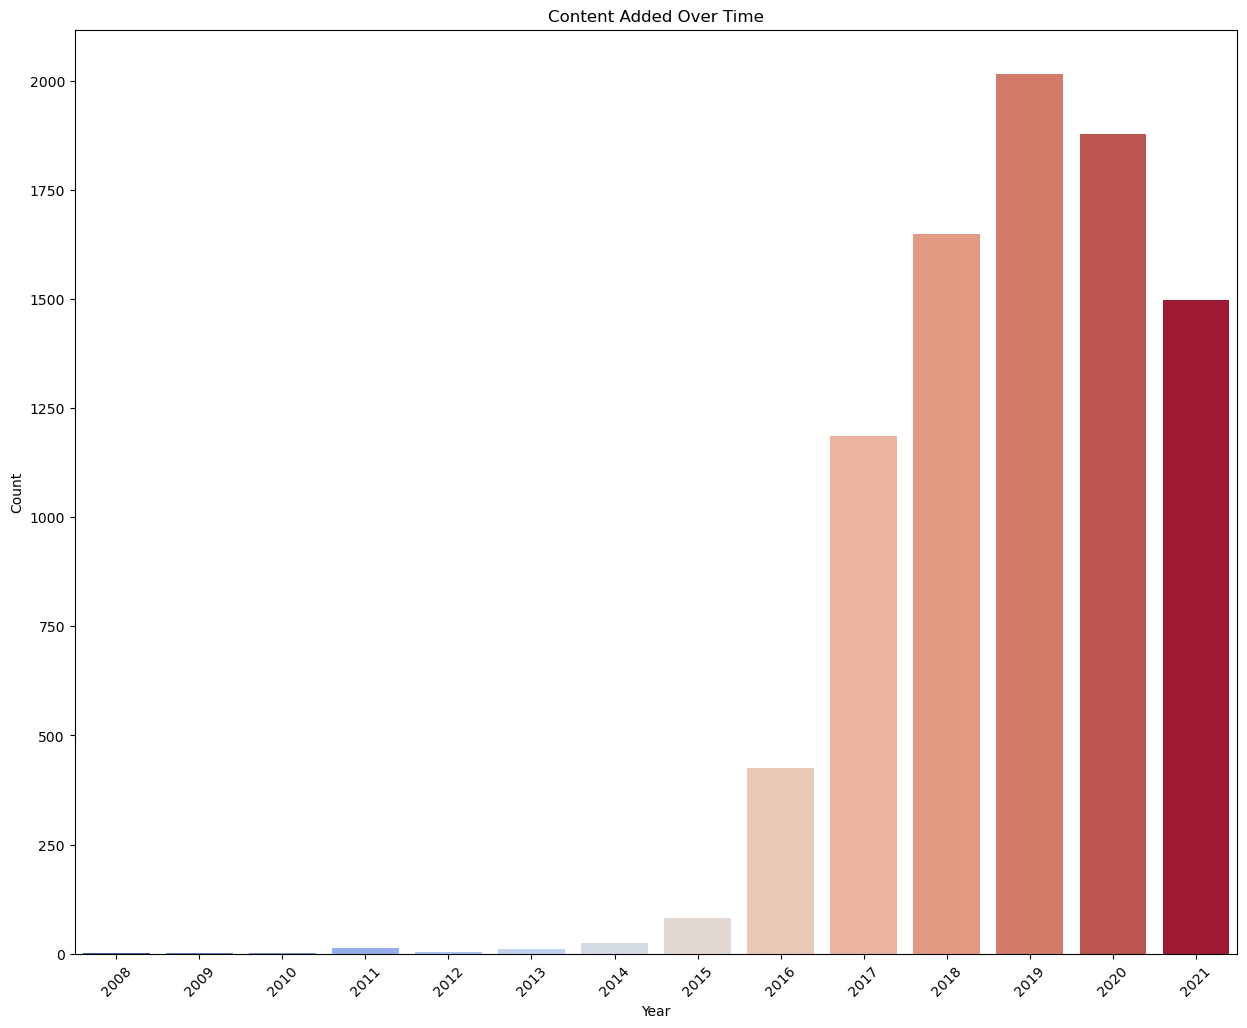

In [511]:
#Content added over time
#extract year and month from date_added
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

#plot content added over the years
plt.figure(figsize=(15,12))
sns.countplot(x='year_added', data=netflix_data, palette='coolwarm',hue='year_added', legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

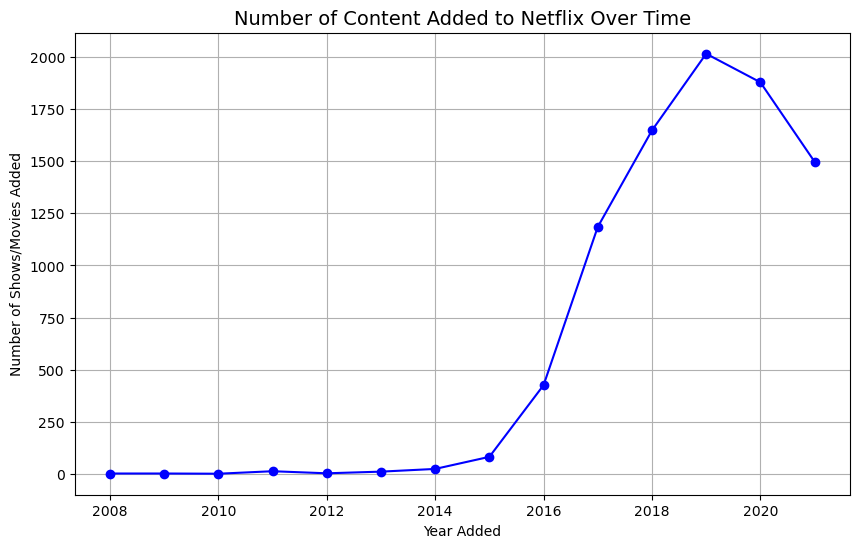

In [512]:
# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Extract year and count content added by year
netflix_data['year_added'] = netflix_data['date_added'].dt.year
content_by_year = netflix_data['year_added'].value_counts().sort_index()

# Plot the trend of content added over time
plt.figure(figsize=(10, 6))
plt.plot(content_by_year.index, content_by_year.values, marker='o', color='b')
plt.title('Number of Content Added to Netflix Over Time', fontsize=14)
plt.xlabel('Year Added')
plt.ylabel('Number of Shows/Movies Added')
plt.grid(True)
plt.show()


In [ ]:
#Top 10 directors with the most title
#count the titles by director
top_director= netflix_data['director'].value_counts()
top_director.head(3)

#plot top directors
plt.figure(figsize=(15,12))
sns.barplot(x=top_director.values, y=top_director.index, palette='Blues_d', hue=top_director.index, legend=False)
plt.title('Top Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [ ]:
#Content Type Distribution(Movies vs TV shows)
#count the number of movies and tv shows
type_count=netflix_data['type'].value_counts()
type_count

In [ ]:
#Word Cloud of Movie Titles
movie_titles = netflix_data[netflix_data['type']=="Movie"]['title']
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(' '.join(movie_titles))

#plot word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Convert non-integer values to NaN in 'duration_minutes'
netflix_data['duration_minutes'] = pd.to_numeric(netflix_data['duration_minutes'], errors='coerce')

# Check if conversion was successful
print(netflix_data['duration_minutes'].isna().sum())


In [ ]:
# Fill missing values (e.g., with median duration)
netflix_data['duration_minutes'] = netflix_data['duration_minutes'].fillna(netflix_data['duration_minutes'].median())
print(netflix_data['duration_minutes'].isna().sum()) #to check the how many columns have null value

In [ ]:
#correlation and heatmap
#correlation between the numerical features
#netflix_data['duration_minutes']= netflix_data[netflix_data['duration_minutes'].apply(lambda x: isinstance(x, int))]
plt.figure(figsize=(8, 6))
sns.heatmap(netflix_data[['release_year', 'genre_count', 'duration_minutes']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', fontsize=14)
plt.show()


### Data Preparation
#cleaning the data, encoding categorical variables, and split the data into traning and testing sets

In [ ]:
from datetime import datetime
current_year = datetime.now().year
netflix_data['content_age'] = current_year - netflix_data['release_year']


### Data Preparation

In [ ]:
#clean the data, encode categorical varibales, and split the data into traning and testing sets
#Encode 'type' column to numericaal (Movie =0, TV Show 1)
netflix_data['type_encoded'] = netflix_data['type'].apply(lambda x:1 if x == 'TV Show' else 0 )

# Assuming 'type_encoded' is the target variable
class_0 = netflix_data[netflix_data['type_encoded'] == 0]
class_1 = netflix_data[netflix_data['type_encoded'] == 1]

# Check their sizes
print("Class 0 size:", len(class_0))
print("Class 1 size:", len(class_1))


#select features and targets
X = netflix_data[['release_year', 'genre_count', 'duration_minutes']]
y=netflix_data['type_encoded']



#train-test spllit (80% train, 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.utils import resample

# Check if class_1 is smaller than class_0
if len(class_1) > 0:
    if len(class_1) < len(class_0):
        # Upsample the minority class (class_1)
        class_1_upsampled = resample(class_1,
                                     replace=True,  # sample with replacement
                                     n_samples=len(class_0),  # to match class_0
                                     random_state=42)  # reproducibility
        # Combine the upsampled class_1 with class_0
        netflix_data_balanced = pd.concat([class_0, class_1_upsampled])
    else:
        netflix_data_balanced = netflix_data  # If balanced, keep as-is
else:
    raise ValueError("Class 1 is empty. Cannot proceed with resampling.")


In [ ]:
class_0_downsampled = resample(class_0, 
                               replace=False, 
                               n_samples=len(class_1), 
                               random_state=42)
netflix_data_balanced = pd.concat([class_0_downsampled, class_1])
#downsampling the data so that both the classes can have same data and it will be easy for performing the ML operations

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

#Initialzie the scaler
scaler = StandardScaler()

#Scale the traning and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Traning

In [ ]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")


In [ ]:
print(f"y_test: {len(y_test)}")
print(f"y_pred: {len(y_pred)}")
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Set zero_division=1 or 0 to handle undefined metrics
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC: {roc_auc}")


As we can see there are 2 model(Decision tree and Random forest) which gives us the accuracy of 0.99% i.e., 99% 
In this we are making use of random forest for future 

### Model Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

# Encode 'type' column to numerical (Movie=0, TV Show=1)
netflix_data['type_encoded'] = netflix_data['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Select features and target
X = netflix_data[['release_year', 'genre_count', 'duration_minutes']]
y = netflix_data['type_encoded']



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = model.score(X_test_scaled, y_test)
    print(f"{name} Model:\n")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {score}\n\n")
    
    if score > best_score:
        best_score = score
        best_model = model

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"Best Model Saved: {type(best_model).__name__} with Accuracy: {best_score}")

In [ ]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Example of making a prediction
new_data = [[2021, 3, 98]]  # Example input: [release_year, genre_count, duration_minutes]
scaled_data = scaler.transform(new_data)
prediction = loaded_model.predict(scaled_data)

result = "TV Show" if prediction[0] == 1 else "Movie"
print("Prediction:", result)